In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [18]:
IT_MAX = 50 
N = 50
psi = np.zeros(N+1)
L = 5
delta_x = 2*L/N

# ostatnie wartosci maja polozenie to je tu uwzgledniam
x_values = np.linspace(-L, L, N+1)
    
# warunek brzegowy
psi[0] = psi[N] = 0

# operator energii całkowitej nie uwzględnia brzegów
Hamiltonian = np.zeros((N-1, N-1))
for i in range(N-1):
    Hamiltonian[i, i] = 1 / np.power(delta_x, 2) + 0.5 * np.power(x_values[i+1], 2)
    if i > 0:
        Hamiltonian[i, i-1] = -0.5 / np.power(delta_x, 2)
        Hamiltonian[i-1, i] = -0.5 / np.power(delta_x, 2)
    
for i in range(0, N-1):
    Hamiltonian[i][i] = np.power(delta_x,-2) + 0.5 * np.power(x_values[i+1],2)
    
Hamiltonian

array([[ 36.52, -12.5 ,   0.  , ...,   0.  ,   0.  ,   0.  ],
       [-12.5 ,  35.58, -12.5 , ...,   0.  ,   0.  ,   0.  ],
       [  0.  , -12.5 ,  34.68, ...,   0.  ,   0.  ,   0.  ],
       ...,
       [  0.  ,   0.  ,   0.  , ...,  34.68, -12.5 ,   0.  ],
       [  0.  ,   0.  ,   0.  , ..., -12.5 ,  35.58, -12.5 ],
       [  0.  ,   0.  ,   0.  , ...,   0.  , -12.5 ,  36.52]])

In [25]:
# Obliczenie maksymalnej wartości wiersza macierzy Hamiltona
gersz = np.zeros(N-1)
for i in range(N-1):
    for j in range(N-1):
        gersz[i] += Hamiltonian[i][j]

# Indeks maksymalnej wartości
gorin = np.argmax(gersz)

# Maksymalna wartość
max_value = gersz[gorin]

# Ustalenie przedziału poszukiwań wartości własnych
a = -max_value
b = max_value

In [24]:
# Funkcja obliczająca wartość wielomianu charakterystycznego p_k(λ)
def characteristic_polynomial(H, lambda_value):
    p_values = np.zeros(N-1)  # Zwiększamy rozmiar tablicy p_values o 1
    p_values[0] = 1
    p_values[1] = H[1, 1] - lambda_value
    for k in range(2, N-1):
        p_values[k] = (H[k, k] - lambda_value) * p_values[k-1] - np.power(H[k-1, k], 2) * p_values[k-2]
    return p_values

# Funkcja obliczająca liczbę zmian znaku w ciągu p_k(λ)
def count_sign_changes(p_values):
    return np.sum(np.diff(np.sign(p_values)) != 0)

# Metoda bisekcji do znalezienia wartości własnej lambda_i
def bisection_method(H, a, b, i):
    lambda_values = []
    for _ in range(IT_MAX):
        lambda_j = (a + b) / 2
        p_values = characteristic_polynomial(H, lambda_j)
        n = count_sign_changes(p_values)
        if n < i:
            a = lambda_j
        else:
            b = lambda_j
        lambda_values.append(lambda_j)
    return lambda_values[-1]

In [33]:
# Obliczenie pięciu pierwszych wartości własnych i odpowiadających im wektorów własnych
eigenvalues = []
eigenvectors = []
for i in range(1, 6):
    lambda_i = bisection_method(Hamiltonian, a, b, i)
    eigenvalues.append(lambda_i)
    
    # Rekurencyjne obliczenie wektora własnego xi
    xi = np.zeros(N+1)  # Zwiększamy rozmiar xi o 1
    xi[0] = xi[N] = 0  # Ustawiamy wartości na brzegach na 0
    
    for k in range(1, N):  # Poprawiamy zakres, aby nie uwzględniał brzegów
        xi[k] = ((Hamiltonian[k-1, k-1] - lambda_i) * xi[k-1] - np.power(Hamiltonian[k-2, k-1], 2) * xi[k-2]) / Hamiltonian[k-1, k-1]
        
    # Unormowanie wektora własnego
    norm = np.linalg.norm(xi[1:N])  # Normalizujemy tylko wewnętrzne wartości
    if norm > 0:
        xi[1:N] /= norm
    
    eigenvectors.append(xi)

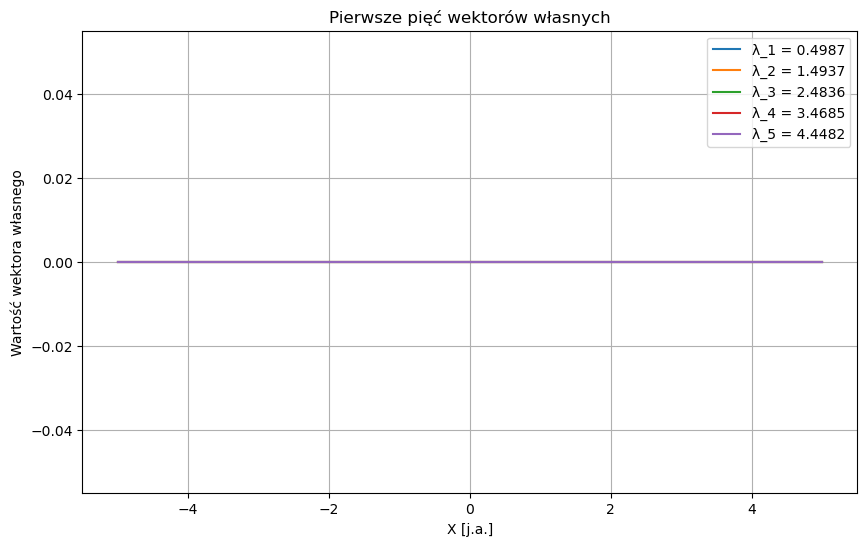

In [34]:
# Narysowanie wektorów własnych na wspólnym wykresie
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.plot(x_values, eigenvectors[i], label=f'λ_{i+1} = {eigenvalues[i]:.4f}')  # Uwzględniamy wszystkie wartości x_values
plt.xlabel('X [j.a.]')
plt.ylabel('Wartość wektora własnego')
plt.title('Pierwsze pięć wektorów własnych')
plt.legend()
plt.grid(True)
plt.show()